# Tecnologies per al Tractament de l'Anàlisi de Dades
## Taller de Pandas

[**Albert Moya**](https://github.com/albertmoyanadal/ttad_pandas_project)

### Actividad 1: Introducción a Pandas 

Con el fichero Fichero `data/sample_NYC_parking_issues.csv`


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)


#### A. ¿Qué dimensiones y características presentan estos datos?


In [2]:
df = pd.read_csv('data/sample_NYC_parking_issues.csv', sep=';')

print(df.shape) # dimensions de les dades
print('-'*80)

print(df.info())    # noms de les columnes i tipus de dades 
print('-'*80)

print(df.describe())  # estadístiques descriptives de les dades numèriques
print('-'*80)

(10000, 44)
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         10000 non-null  int64  
 1   Summons Number                     10000 non-null  int64  
 2   Plate ID                           9998 non-null   object 
 3   Registration State                 10000 non-null  object 
 4   Plate Type                         10000 non-null  object 
 5   Issue Date                         10000 non-null  object 
 6   Violation Code                     10000 non-null  int64  
 7   Vehicle Body Type                  9887 non-null   object 
 8   Vehicle Make                       9918 non-null   object 
 9   Issuing Agency                     10000 non-null  object 
 10  Street Code1              

####  B. Selecciona las muestras `4DSD` en `Vehicle Body Type`  y guardalas en un nuevo fichero.


In [3]:
df_4DSD = df[df['Vehicle Body Type'] == '4DSD'] # seleccionar només els vehicles de tipus 4DSD

df_4DSD.to_csv('data/vehicle_4DSD.csv', index=False)    # guardar el nou DataFrame en un fitxer CSV

#### C. ¿Cuántos colores de vehículos hay?


In [ ]:
print(df['Vehicle Color'].nunique()) # .nunique() compta els valors únics en una columna

106


#### D. ¿Cuál es el rango de años en la antigüedad del vehículo? ¿Cuál es el año más frecuente?


In [ ]:
# Rang d'anys
min_year = df['Vehicle Year'].min()
max_year = df['Vehicle Year'].max()

print(max_year - min_year) # Sembla que hi ha un error en les dades

# Any del vehicle més freqüent
print(df['Vehicle Year'].mode())

2069.0
0    0.0
Name: Vehicle Year, dtype: float64


Parece que hay un error en los datos, o la variable escogida no és la correcta.

#### E. ¿Cuál es el tipo de vehículo más viejo? ¿ y el más nuevo?


In [18]:
oldest_vehicles = df.loc[df['Vehicle Year'] == min_year, 'Vehicle Body Type']
newest_vehicles = df.loc[df['Vehicle Year'] == max_year, 'Vehicle Body Type']

print(oldest_vehicles.value_counts().head(1))
print(newest_vehicles.value_counts().head(1))

Vehicle Body Type
4DSD    785
Name: count, dtype: int64
Vehicle Body Type
2DSD    1
Name: count, dtype: int64


####  F. ¿Cuál es la distancia mínima del vehículo a la acera `Feet From Curb`?


In [21]:
print(df['Feet From Curb'].min())

0.0


####  G. Selecciona aquellas muestras que estén por debajo de la distancia `Feet From Curb` media.


In [22]:
FFC_under_mean = df[df['Feet From Curb'] < df['Feet From Curb'].mean()]

####  H. Elimina las dos últimas columnas del dataframe creando uno nuevo.


In [24]:
# Eliminar las dos últimas columnas del dataframe original
df1 = df.iloc[:, :-2]
df1.shape


(10000, 42)

#### I. Selecciona la 4ª, 6ª y 8ª columna de las filas comprendidas entre la 1 y 100, y la 200 y 500.


In [ ]:
# seleccionam files i columnes
rows = list(range(1, 101)) + list(range(200, 501))  # 1-100 i 200-500
cols = [3, 5, 7]

# cream el nou DataFrame
df2 = df.iloc[rows, cols]


#### J. ¿Hay vehículos que han recibido más de una multa ?


In [27]:
fine = df['Plate ID'].value_counts()
vehicle_multiple_fines = fine[fine > 1]

print(len(vehicle_multiple_fines))

168


####  K. Los nombres de los propietarios (nombres ficticios) están en otro fichero (`plates_properties.csv`), combina ambos ficheros con coherencia en relación a la informació y guarda el resultado en otro documento `.csv`.

In [34]:
df_properties = pd.read_csv('data/plates_properties.csv')
print(df_properties.info())

df_properties = df.rename(columns={'plate_id': 'Plate ID'}) # Renombram la columna per fer-la coincidir

df_merged = pd.merge(df, df_properties, on='Plate ID', how='left')
print(df_merged.info())

df_merged.to_csv('data/complete_parking_issues.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9805 entries, 0 to 9804
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9805 non-null   int64 
 1   plate_id    9804 non-null   object
 2   Name        9805 non-null   object
dtypes: int64(1), object(2)
memory usage: 229.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10582 entries, 0 to 10581
Data columns (total 87 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0_x                         10582 non-null  int64  
 1   Summons Number_x                     10582 non-null  int64  
 2   Plate ID                             10578 non-null  object 
 3   Registration State_x                 10582 non-null  object 
 4   Plate Type_x                         10582 non-null  object 
 5   Issue Date_x                         10582 non-null  object 


####  L. Transmite una idea o mensaje con una visualización. Diseña y comenta mensaje y posteriormente, genera la visualización.

La idea es mostrar la distribución de multas por día de la semana

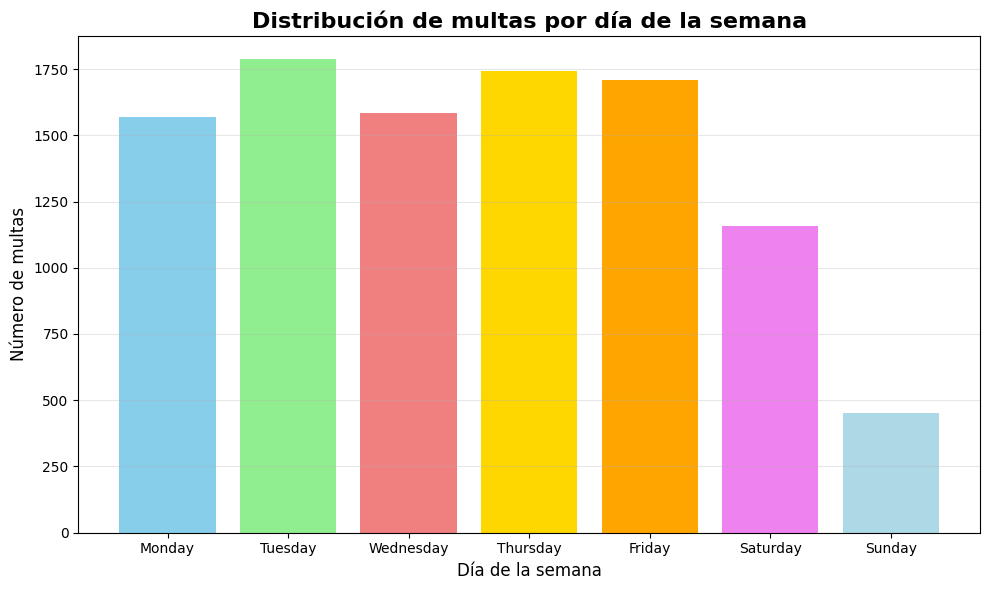

In [39]:
df['Issue Date'] = pd.to_datetime(df['Issue Date'])
df['Week Day'] = df['Issue Date'].dt.dayofweek

week_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fine_per_day = df['Week Day'].value_counts().sort_index()

# CGràfic
plt.figure(figsize=(10, 6))
bars = plt.bar(week_day, fine_per_day, color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'orange', 'violet', 'lightblue'])

plt.title('Distribución de multas por día de la semana', fontsize=16, fontweight='bold')
plt.xlabel('Día de la semana', fontsize=12)
plt.ylabel('Número de multas', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
